<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/gilead_sciences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install  yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=f7d9afec55def041497c96175057a575426235c8331436194b731b57e3d80538
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
GILD = "GILD" 

In [4]:
GILD = yfinance.download(GILD)

GILD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-22,0.539062,0.679688,0.539062,0.632812,0.538724,168022400
1992-01-23,0.656250,0.710938,0.632812,0.687500,0.585281,38368000
1992-01-24,0.695312,0.726562,0.671875,0.695312,0.591932,12044800
1992-01-27,0.726562,0.750000,0.695312,0.750000,0.638488,10716800
1992-01-28,0.742188,0.757812,0.710938,0.734375,0.625186,19913600
...,...,...,...,...,...,...
2020-09-21,64.809998,64.970001,63.459999,64.209999,64.209999,8575200
2020-09-22,64.080002,64.580002,63.290001,63.400002,63.400002,7228200
2020-09-23,63.509998,64.080002,63.000000,63.090000,63.090000,8520200


In [5]:
GILD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-01-22,0.539062,0.679688,0.539062,0.632812,0.538724,168022400
1992-01-23,0.656250,0.710938,0.632812,0.687500,0.585281,38368000
1992-01-24,0.695312,0.726562,0.671875,0.695312,0.591932,12044800
1992-01-27,0.726562,0.750000,0.695312,0.750000,0.638488,10716800
1992-01-28,0.742188,0.757812,0.710938,0.734375,0.625186,19913600


In [6]:
GILD.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-09-21,64.809998,64.970001,63.459999,64.209999,64.209999,8575200
2020-09-22,64.080002,64.580002,63.290001,63.400002,63.400002,7228200
2020-09-23,63.509998,64.080002,63.000000,63.090000,63.090000,8520200
2020-09-24,62.700001,62.840000,61.650002,62.250000,62.250000,9004600
2020-09-25,62.099998,62.509998,61.770000,62.250000,62.250000,7141000


In [7]:
GILD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7.225000e+03
mean,27.625112,27.944302,27.266638,27.609427,24.315910,1.519701e+07
std,32.655300,32.995779,32.249883,32.626968,28.935516,1.491445e+07
min,0.218750,0.226562,0.207031,0.218750,0.186226,0.000000e+00
25%,1.343750,1.378906,1.320312,1.351562,1.150609,7.057700e+06
50%,15.257500,15.452500,15.017500,15.272500,13.001742,1.207340e+07
75%,57.849998,59.139999,57.490002,58.220001,49.563690,1.910110e+07
max,122.480003,123.370003,121.650002,122.209999,104.416359,4.553760e+08


In [8]:
GILD.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
1992-01-22   0.539062   0.679688   0.539062   0.632812   0.538724  168022400
1992-01-23   0.656250   0.710938   0.632812   0.687500   0.585281   38368000
1992-01-24   0.695312   0.726562   0.671875   0.695312   0.591932   12044800
1992-01-27   0.726562   0.750000   0.695312   0.750000   0.638488   10716800
1992-01-28   0.742188   0.757812   0.710938   0.734375   0.625186   19913600
...               ...        ...        ...        ...        ...        ...
2020-09-21  64.809998  64.970001  63.459999  64.209999  64.209999    8575200
2020-09-22  64.080002  64.580002  63.290001  63.400002  63.400002    7228200
2020-09-23  63.509998  64.080002  63.000000  63.090000  63.090000    8520200
2020-09-24  62.700001  62.840000  61.650002  62.250000  62.250000    9004600
2020-09-25  62.099998  62.509998  61.770000 

In [9]:
GILD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7225 entries, 1992-01-22 to 2020-09-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7225 non-null   float64
 1   High       7225 non-null   float64
 2   Low        7225 non-null   float64
 3   Close      7225 non-null   float64
 4   Adj Close  7225 non-null   float64
 5   Volume     7225 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 395.1 KB


In [10]:
conn = sqlite3.connect("GILD.db")
c = conn.cursor()

In [11]:
conn = sqlite3.connect("GILD.db")
c = conn.cursor()

In [12]:
GILD.to_sql("GILD", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
#See data
c.execute("""SELECT * FROM GILD""")
rows = c.fetchall()
rows

[('1992-01-22 00:00:00',
  0.5390625,
  0.6796875,
  0.5390625,
  0.6328125,
  0.5387242436408997,
  168022400),
 ('1992-01-23 00:00:00',
  0.65625,
  0.7109375,
  0.6328125,
  0.6875,
  0.5852805376052856,
  38368000),
 ('1992-01-24 00:00:00',
  0.6953125,
  0.7265625,
  0.671875,
  0.6953125,
  0.5919315218925476,
  12044800),
 ('1992-01-27 00:00:00',
  0.7265625,
  0.75,
  0.6953125,
  0.75,
  0.6384879350662231,
  10716800),
 ('1992-01-28 00:00:00',
  0.7421875,
  0.7578125,
  0.7109375,
  0.734375,
  0.6251861453056335,
  19913600),
 ('1992-01-29 00:00:00',
  0.7109375,
  0.734375,
  0.6796875,
  0.6796875,
  0.578629732131958,
  13238400),
 ('1992-01-30 00:00:00',
  0.6875,
  0.6953125,
  0.609375,
  0.609375,
  0.5187714099884033,
  10848000),
 ('1992-01-31 00:00:00',
  0.625,
  0.6484375,
  0.609375,
  0.6484375,
  0.5520261526107788,
  2496000),
 ('1992-02-03 00:00:00',
  0.65625,
  0.65625,
  0.6328125,
  0.640625,
  0.5453750491142273,
  2320000),
 ('1992-02-04 00:00:00',
  

In [14]:
GILD.to_excel("GILD.xls")

pd.read_excel("GILD.xls")

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-01-22,0.539062,0.679688,0.539062,0.632812,0.538724,168022400
1,1992-01-23,0.656250,0.710938,0.632812,0.687500,0.585281,38368000
2,1992-01-24,0.695312,0.726562,0.671875,0.695312,0.591932,12044800
3,1992-01-27,0.726562,0.750000,0.695312,0.750000,0.638488,10716800
4,1992-01-28,0.742188,0.757812,0.710938,0.734375,0.625186,19913600
...,...,...,...,...,...,...,...
7220,2020-09-21,64.809998,64.970001,63.459999,64.209999,64.209999,8575200
7221,2020-09-22,64.080002,64.580002,63.290001,63.400002,63.400002,7228200
7222,2020-09-23,63.509998,64.080002,63.000000,63.090000,63.090000,8520200
7223,2020-09-24,62.700001,62.840000,61.650002,62.250000,62.250000,9004600


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.


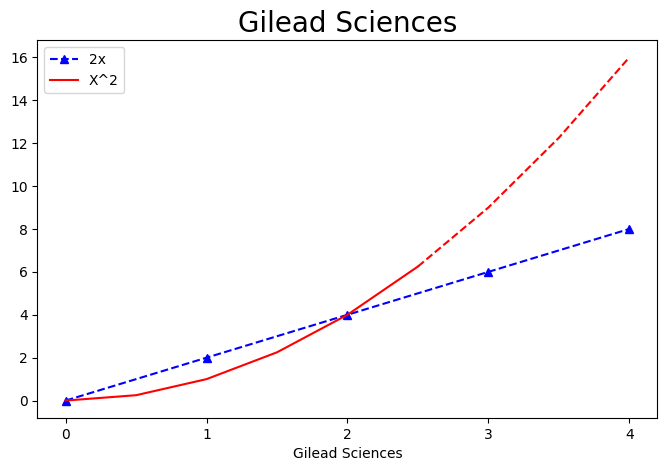

In [15]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Resize your Graph (dpi specifies pixels per inch. When saving probably should use 300 if possible)
plt.figure(figsize=(8,5), dpi=100)

# Line 1

# Keyword Argument Notation
#plt.plot(x,y, label='2x', color='red', linewidth=2, marker='.', linestyle='--', markersize=10, markeredgecolor='blue')

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(x,y, 'b^--', label='2x')

## Line 2

# select interval we want to plot points at
x2 = np.arange(0,4.5,0.5)

# Plot part of the graph as line
plt.plot(x2[:6], x2[:6]**2, 'r', label='X^2')

# Plot remainder of graph as a dot
plt.plot(x2[5:], x2[5:]**2, 'r--')

# Add a title (specify font parameters with fontdict)
plt.title('Gilead Sciences', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})

# X and Y labels
plt.xlabel('Gilead Sciences')

# X, Y axis Tickmarks (scale of your graph)
plt.xticks([0,1,2,3,4,])
#plt.yticks([0,2,4,6,8,10])

# Add a legend
plt.legend()

# Save figure (dpi 300 is good when saving so graph has high resolution)
plt.savefig('mygraph.png', dpi=300)

# Show plot
plt.show()

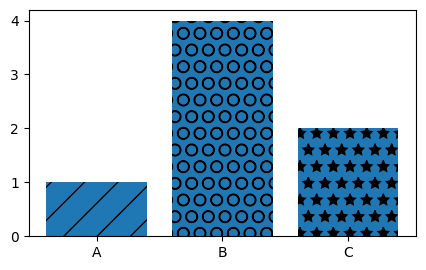

In [16]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)

patterns = ['/', 'O', '*']
for bar in bars:
    bar.set_hatch(patterns.pop(0))

plt.savefig('barchart.png', dpi=300)

plt.show()